# Παραδοτέα Εργαστηριακής Άσκησης 4

## 'Ασκηση 1

Αρχικά φορτώνουμε τις κατάλληλες βιβλιοθήκες 


In [1]:
import numpy as np
from numpy.random import choice

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)  

### Ερώτηση 1

Γι'αυτό το ερώτημα θα χρησιμοποιήσουμε τη γεννήτρια rand_walk_Z, δημιουργώντας δύο διαφορετικούς "walkers" έναν με αριστερό bias (walkerL) και έναν με δεξί bias (walkerR). Όπως φαίνεται στον κώδικα θα χρησιμοποιηθούν δύο, η LT500 και η RT500 στις οποίες θα αποθηκεύουμε τo πλήθος των βημάτων απο κάθε προσομοίωση μέχρι την έξοδο από το διάστημα [-70, 100].

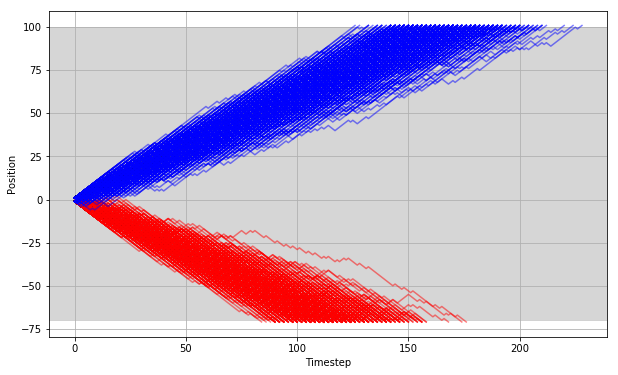

In [2]:
fig, ax = plt.subplots()  # initiate plots

np.random.seed(2017)  # same results are previous run
# random walk generator:
def rand_walk_Z(start, probs):
    x = start
    steps = [-1, 1]  # probs order should be (left, right)
    while True:  # continue for ever in needed
        x += choice(steps, p=probs)
        yield x  # it's a generator!

walkerL = rand_walk_Z(0, (4./5., 1./5.))  # left-biased walker
walkerR = rand_walk_Z(0, (1./5., 4./5.))  # right-biased walker

a = -70
b = 100

LT500 = [] # this will be used to store the number of steps of each walk (for L-biased)
for n in range(500): #500 simulations
    x = 0
    onewalk = [] # this will be used to store the positions
    walkerL=rand_walk_Z(0, (4./5., 1./5.)) # the walker will be initialized for every simulation
    while a<=x<=b:
        x = next(walkerL)
        onewalk.append(x) # store the current position
    LT500.append(len(onewalk)) # I will need only the number of steps
    plt.plot(onewalk, color='red', alpha=0.5) #plot every simulation

RT500 = [] # the same for the R-biased walker...
for n in range(500):
    x = 0
    onewalk = []
    walkerL=rand_walk_Z(0, (1./5., 4./5.)) # this is the only difference...
    while a<=x<=b:
        x = next(walkerL)
        onewalk.append(x)
    RT500.append(len(onewalk))
    plt.plot(onewalk, color='blue', alpha=0.5) # plot every simulation

    
plt.axhspan(a, b, color = '#cccccc', alpha = 0.8)  # box between a & b
ax.grid()  # adds grid lines
plt.xlabel('Timestep')
plt.ylabel('Position')
plt.show()
pass

### Σχολιασμός Αποτελέσματος
Όπως ήταν αναμενόμενο, οι L-biased περίπατοι καταλήγουν εκτός του διαστήματος εξερχόμενοι από αριστερά, ενώ οι R-biased περίπατοι εξέρχονται δεξιά του διαστήματος. Επίσης κατα μέσο όρο φαίνεται να υπάρχει συμμετρία, καθώς οι πιθανότητες είναι και αυτές συμμετρικές στις δύο περιπτώσεις. Η αβεβαιότητα κάθε περίπτατου αυξάνεται όσο αυξάνεται όσο αυξάνονται τα βήματα (παρατηρώντας το εύρος κάθε περιοχής για δεδομένο timestep) και μάλιστα η εξάρτηση αυτή φαίνεται να είναι γραμμική.

### Ερώτηση 2

Παρακάτω προχωρούμε στην εμφάνιση των ιστογραμμάτων για τους χρόνους εξόδου. Για τον αριθμό των bins όπως φαίνεται και από τον κώδικα, θα χρησιμοποιηθούν όλοι οι ακέραραιοι από το ελάχιστο ώς το μέγιστο παρατηρούμενο timestep εξόδου για κάθε περίπτωση

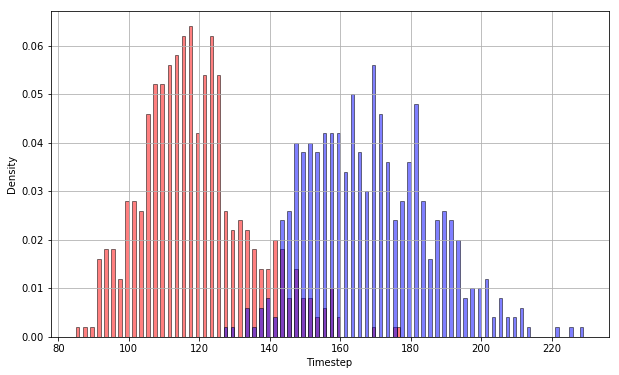

In [3]:
fig, ax = plt.subplots()  # initiate plots

plt.hist(LT500, color='red', alpha=0.5, bins=max(LT500)-min(LT500), edgecolor='black', normed=True)
plt.hist(RT500, color='blue', alpha=0.5, bins=max(RT500)-min(RT500), edgecolor='black', normed=True)
plt.xlabel('Timestep')
plt.ylabel('Density')
ax.grid() 
plt.show()

### Σχολιασμός Αποτελέσματος

Όπως φαίνεται οι μέσοι χρόνοι και εξόδων για τους R-biased περίπτατους είναι μεγαλύτεροι καθώς το διάστημα δεν είναι συμμετρικό. Επίσης φαίνεται να υπάρχει και λίγο μεγαλύτερη διασπορά. Και οι δύο κατανομές είναι positive-skewed. Κάτι τέτοιο είναι αναμενόμενο. Ωστόσο όσο μεγαλύτερος είναι ο μέσος χρόνος εξόδου, τόσο μικρότερο είναι και το skewness. 

## Άσκηση 2


### Ερώτημα 1

Παρακάτω θα δημιουργήσουμε την αλυσίδα και θα την προσομοιώσουμε 1000 φορές αποθηκεύοντας τα 1000 πρώτα βήματα. Για να το επιτύχουμε αυτό δημιουργούμε την γεννήτρια rand_walk_Zplus και μία λίστα απο λίστες (την allwalks) στην οποία θα αποθηκεύουμε τις θέσεις κάθε περιπάτου για κάθε προσομοίωση.

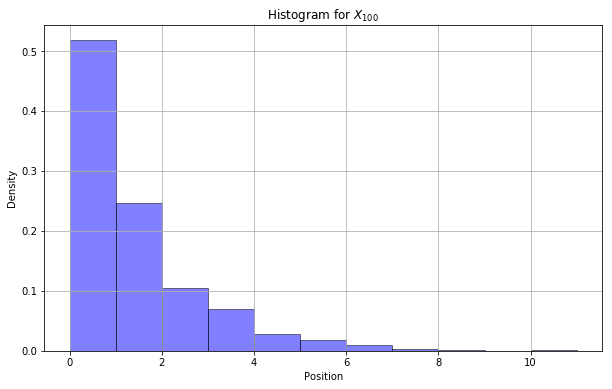

In [4]:
fig, ax = plt.subplots()  # initiate plots

# random walk generator:
def rand_walk_Zplus(start, probs):
    x = start
    steps = [-1, 1]  # probs order should be (left, right)
    while True:  # continue for ever in needed
        if x==0:
            x += choice([0,1],p=(2./3., 1./3.)) # if k=0...
        else:
            x += choice(steps, p=probs)
        yield x


allwalks = [] # this will be a list of lists were I will store all random walks
for n in range(1000):
    walkerZplus = rand_walk_Zplus(0, (2./3, 1./3)) # initialize all walker...
    onewalk = [] # initialize the list for storing 1 walk
    for k in range(1000):
        x = next(walkerZplus)
        onewalk.append(x)
    allwalks.append(onewalk)

Walks = np.matrix(allwalks) # I will use numpy so I convert it to a matrix (it's easier)
plt.hist(Walks[:,100], color='blue', alpha=0.5, bins = np.max(Walks[:,100]), edgecolor='black', normed=True)
plt.xlabel('Position')
plt.ylabel('Density')
plt.title('Histogram for $X_{100}$')
ax.grid()
plt.show()
pass

Και πάλι όπως αναμενόμενο βλέπουμε μια positively-skewed κατανομή.

### Ερώτημα 2

Για το επόμενο ερώτημα, έχοντας αποθηκεύσει τις θέσεις στον πίνακα Walks, είναι εύκολο πλέον να υπολογίσουμε την μέγιστη τιμή κάθε γραμμής (δηλαδή τη μέγιστη θέση) και στη συνέχεια να εμφανίσουμε το ζητούμενο ιστόγραμμα.

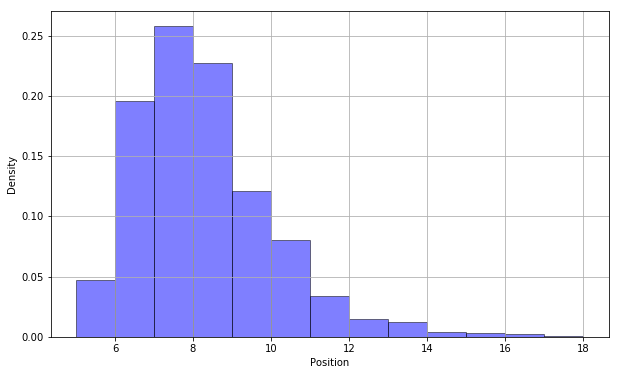

mean = 7.783, variance = 3.224


In [5]:
fig, ax = plt.subplots()  # initiate plots

M1000 = np.max(Walks[:,1:1000], axis=1) # M1000 will have the maximum position for each simulation (1000 first steps)

plt.hist(M1000, color='blue', alpha=0.5, bins = np.max(M1000)-np.min(M1000),edgecolor='black', normed=True)
plt.xlabel('Position')
plt.ylabel('Density')
ax.grid()
plt.show()

print("mean = {0:.3f}, variance = {1:.3f}".format(np.mean(M1000), np.var(M1000)))

Παραπάνω φαίνεται επίσης η μέση τιμή και η διασπορά της κατανομής (Άν και στις skewed κατανομές πρέπει να προτιμάται ο median ή έστω η πεντάδα (min,Q1,median,Q3,max) ώς αντιπροσωπευτική της κατανομής).

## Άσκηση 3

Γι'αυτή την άσκηση χρησιμοποιούμε την γεννήτρια για τον 2D χώρο όπως φαίνεται παρακάτω

In [6]:
# random walk in Z^2 generator:
def rand_walk_Z2(start=(0, 0), probs=(0.25, 0.25, 0.25, 0.25)):
    # probs order (left, right, bottom, up)
    x, y = start
    steps = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    while True:
        dx, dy = steps[choice(4, p=probs)]  # choice(4) = choose a number in [0,3]
        x, y = x + dx, y + dy
        yield x, y

Έπειτα θα προσωμοιώσουμε την αλυσίδα 500 φορές για κάθε διαφορετική ακτίνα. Θα αποθηκεύσουμε τον χρόνο εξόδου στον διδιάστατο πίνακα escape_time, οπού το στοιχείο (i,j) θα αντιπροσωπεύει τον χρόνο εξόδου της j-οστής προσομοίωσης για την i-οστή ακτίνα. 

In [7]:
r = [10,20,30,40,50,60,70,80,90,100]  # radius of circle boundary

N = 500  # sample size

escape_time = np.zeros( (len(r),N), dtype=int) # 
for radius,i in zip(r,range(len(r))):
    for j in range(N):
        walker = rand_walk_Z2() #initialize walker for every simulation 
        x,y = (0,0) #redundant... not needed
        t = 0
        while x**2 + y**2 < radius**2:
            x, y = next(walker)
            t += 1
        escape_time[i,j] = t

pass

Στη συνέχεια θα απεικονίσουμε τους μέσους χρόνους εξόδου για κάθε ακτίνα (ουσιαστικά υπολογίζουμε τον μέσο για κάθε γραμμή του πίνακα escape_time) χρησιμοποιώντας λογαριθμικούς άξονες.

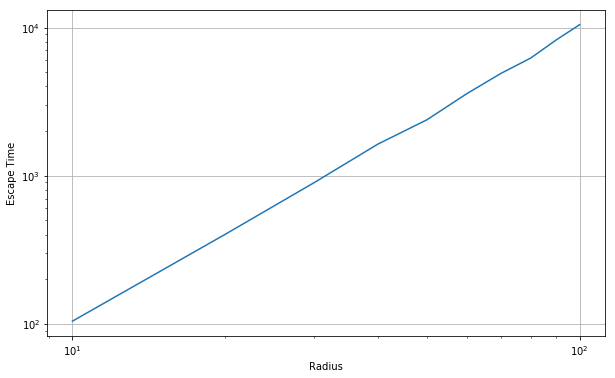

In [8]:
plt.loglog(r, np.mean(escape_time, axis=1))
plt.grid(True)
plt.xlabel('Radius')
plt.ylabel('Escape Time')
pass

Απ'ότι βλέπουμε η σχέση φαίνεται να είναι γραμμική. Αυτό σημαίνει ότι αν $T_r$ o χρόνος δραπέτευσης για ακτίνα $r$, τότε εμπειρικά φαίνεται ότι $log(T_r) = \alpha log(r) + \beta$. Άρα $\exists c, n: T_r = c r^n$.